# Additional training functions

[`train`](/train.html#train) provides a number of extension methods that are added to [`Learner`](/basic_train.html#Learner) (see below for a list and details), along with three simple callbacks:

- [`ShowGraph`](/train.html#ShowGraph)
- [`GradientClipping`](/train.html#GradientClipping)
- [`BnFreeze`](/train.html#BnFreeze)

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.train import *
from fastai.docs import *

## [`Learner`](/basic_train.html#Learner) extension methods

These methods are automatically added to all [`Learner`](/basic_train.html#Learner) objects created after importing this module. They provide convenient access to a number of callbacks, without requiring them to be manually created.

In [ ]:
show_doc(fit_one_cycle)

#### <a id=fit_one_cycle></a>`fit_one_cycle`
`fit_one_cycle`(`learn`:[`Learner`](/basic_train.html#Learner), `cyc_len`:`int`, `max_lr`:`Union`\[`float`, `Collection`\[`float`\], `slice`\]=`slice(None, 0.003, None)`, `moms`:`Tuple`\[`float`, `float`\]=`(0.95, 0.85)`, `div_factor`:`float`=`25.0`, `pct_start`:`float`=`0.3`, `wd`:`float`=`None`, `kwargs`)


Fits a model following the 1cycle policy <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L11">[source]</a>

Fit a model with 1cycle training. See [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler) for details.

In [ ]:
show_doc(lr_find)

#### <a id=lr_find></a>`lr_find`
`lr_find`(`learn`:[`Learner`](/basic_train.html#Learner), `start_lr`:`float`=`1e-05`, `end_lr`:`float`=`10`, `num_it`:`int`=`100`, `kwargs`:`Any`)


Explore lr from `start_lr` to `end_lr` over `num_it` iterations of `learn` <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L20">[source]</a>

See [`LRFinder`](/callbacks.lr_finder.html#LRFinder) for details.

In [ ]:
show_doc(to_fp16)

#### <a id=to_fp16></a>`to_fp16`
`to_fp16`(`learn`:[`Learner`](/basic_train.html#Learner), `loss_scale`:`float`=`512.0`, `flat_master`:`bool`=`False`) -> [`Learner`](/basic_train.html#Learner)


Transforms the learner in FP16 precision <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L26">[source]</a>

See [`MixedPrecision`](/callbacks.fp16.html#MixedPrecision) for details.

In [ ]:
show_doc(ShowGraph)

## <a id=ShowGraph></a>class `ShowGraph`
`ShowGraph`(`learn`:[`Learner`](/basic_train.html#Learner)) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)


Updates a graph of learner stats and metrics after each epoch <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L44">[source]</a>

In [ ]:
data = get_mnist()

Total time: 00:15
epoch  train loss  valid loss  accuracy
0      0.087847    0.041322    0.987242  (00:05)
1      0.041547    0.021118    0.993131  (00:05)
2      0.022978    0.013435    0.996565  (00:04)



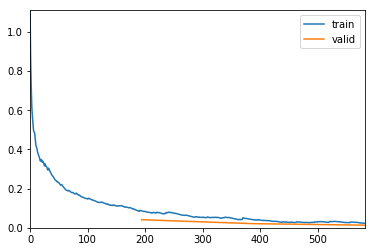

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(3)

Here's an animation of [`ShowGraph`](/train.html#ShowGraph) in action.

![Training graph](imgs/train_graph.gif)

### Internal callback implementation

In [ ]:
show_doc(ShowGraph.on_epoch_end)

#### <a id=on_epoch_end></a>`on_epoch_end`
`on_epoch_end`(`n_epochs`:`int`, `last_metrics`:`Collection`[`Union`[`Tensor`, `Number`]], `kwargs`) -> `bool`


If we have metrics plot them in our pbar graph <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L46">[source]</a>

In [ ]:
show_doc(GradientClipping)

## <a id=GradientClipping></a>class `GradientClipping`
`GradientClipping`(`learn`:[`Learner`](/basic_train.html#Learner), `clip`:`float`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)


To do gradient clipping during training. <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L64">[source]</a>

Clips gradient at a maximum absolute value of `clip` during training. For instance:

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy,
    callback_fns=partial(GradientClipping, clip=0.1))
learn.fit(1)

Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.080691    0.043826    0.986261  (00:05)



### Internal callback implementation

In [ ]:
show_doc(GradientClipping.on_backward_end)

#### <a id=on_backward_end></a>`on_backward_end`
`on_backward_end`(`kwargs`)


Called after backprop but before optimizer step. Useful for true weight decay in AdamW <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L68">[source]</a>

In [ ]:
show_doc(BnFreeze)

## <a id=BnFreeze></a>class `BnFreeze`
`BnFreeze`(`learn`:[`Learner`](/basic_train.html#Learner)) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)


Freezes moving average statistics in all batchnorm layers <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L57">[source]</a>

For batchnorm layers where `requires_grad==False`, you generally don't want to update their moving average statistics, in order to avoid the model's statistics getting out of sync with its pre-trained weights. You can add this callback to automate this freezing of statistics (internally, it calls `eval` on these layers).

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy, callback_fns=BnFreeze)
learn.fit(1)

Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.085482    0.052628    0.984789  (00:05)



### Internal callback implementation

In [ ]:
show_doc(BnFreeze.on_epoch_begin)

#### <a id=on_epoch_begin></a>`on_epoch_begin`
`on_epoch_begin`(`kwargs`:`Any`)


Put bn layers in eval mode on epoch_begin <a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/train.py#L59">[source]</a>